In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
import scipy.io as scio
base = scio.loadmat('ndata.mat')
x,y=base['orgin'].transpose(),base['result'][:,1]

In [3]:
xmin,xmax,ymin,ymax = x.min(),x.max(),y.min(),y.max()
x,y = (x-xmin)/(xmax-xmin),(y-ymin)/(ymax-ymin)

In [4]:
x = x.reshape((40, 1, -1, 1))

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
cnn = Sequential()
cnn.add(Conv2D(64,(3,1),
    padding="valid",
    activation="tanh",
    input_shape=(1,1867,1)))
cnn.add(MaxPooling2D(pool_size=(2,1)))
cnn.add(Conv2D(32,(3,1),padding="valid",activation="tanh"))

# cnn.add(Conv2D(128,(3,1),padding="same",activation="relu"))
#cnn.add(MaxPooling2D(pool_size=(3,1)))

# cnn.add(Conv2D(256,(3,1),padding="same",activation="relu"))
# cnn.add(MaxPooling2D(pool_size=(2,1)))
    
cnn.add(Flatten())
cnn.add(Dense(1024, activation="tanh"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1))
cnn.summary()

In [24]:
# define optimizer and objective, compile cnn
cnn.compile(loss="mse", optimizer="adam")

In [25]:
# train
cnn_record = cnn.fit(x_train, y_train,epochs=1000,batch_size=10)

C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1000
30/30 [==============================] - 0s - loss: 62.0709    
Epoch 2/1000
30/30 [==============================] - 0s - loss: 27.0483     
Epoch 3/1000
30/30 [==============================] - 0s - loss: 26.2353     
Epoch 4/1000
30/30 [==============================] - 0s - loss: 10.3978    
Epoch 5/1000
30/30 [==============================] - 0s - loss: 6.9286      
Epoch 6/1000
30/30 [==============================] - 0s - loss: 7.2185     
Epoch 7/1000
30/30 [==============================] - 0s - loss: 1.7880     
Epoch 8/1000
30/30 [==============================] - 0s - loss: 2.7956     
Epoch 9/1000
30/30 [==============================] - 0s - loss: 1.9366     
Epoch 10/1000
30/30 [==============================] - 0s - loss: 0.3741     
Epoch 11/1000
30/30 [==============================] - 0s - loss: 1.1511     
Epoch 12/1000
30/30 [==============================] - 0s - loss: 0.4252     
Epoch 13/1000
30/30 [==============================] - 0s - loss: 0.15

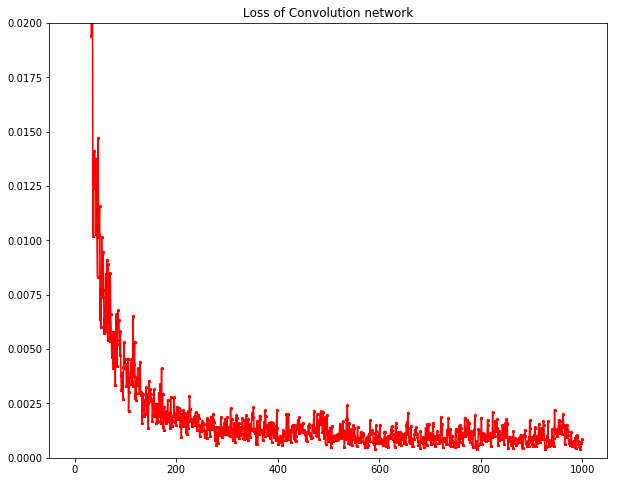

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))
plt.plot(cnn_record.history['loss'],'r-*',ms=3)
plt.ylim([0,0.02])
plt.title('Loss of Convolution network')
plt.savefig('Convolution1D')
plt.show()

In [30]:
loss_conv = np.load('loss_conv.npy')

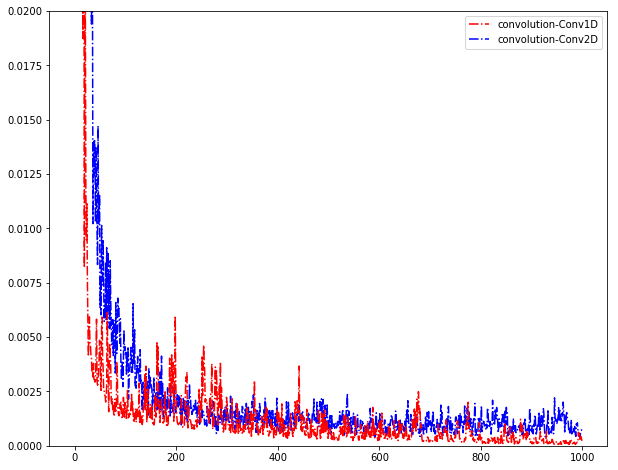

In [36]:
plt.figure(figsize=(10,8))
plt.plot(loss_conv,'r-.',ms=3,label='convolution-Conv1D',zorder=2)
plt.plot(cnn_record.history['loss'],'b-.',ms=3,label='convolution-Conv2D',zorder=1)
plt.ylim([0,0.02])
plt.legend()
plt.savefig('conparison_Con1D_Con2D')
plt.show()

In [28]:
from sklearn.metrics import r2_score
y_train_true,y_train_pred = y_train,cnn.predict(x_train)
y_test_true, y_test_pred  = y_test, cnn.predict(x_test)
print( r2_score(y_test_true, y_test_pred),
      r2_score(y_train_true,y_train_pred))

0.979356164874 0.993321411491


C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))
